## Preparing the data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_parquet("/work/encoded.parquet")
df['accident_severity'] = df['accident_severity'].replace({1: 'Slight',  0.5: 'Serious', 0: 'Fatal'})
df = pd.concat([df, pd.get_dummies(df['accident_severity'])], axis=1)
# df.drop('accident_severity', axis=1, inplace=True)
df.head()

,Unnamed: 0,accident_index,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,time,local_authority_district,...,carriageway_hazards_Vehicle load on road,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Fatal,Serious,Slight
0,0,1991010SU0977,522100.0,200300.0,0.58,Serious,0.058824,0.0,0.565217,0.539301,...,0,1,0,0,0,0,0,0,1,0
1,1,199101AB00001,529970.0,178300.0,0.58,Slight,0.058824,0.0,0.000000,0.967249,...,0,0,0,1,0,0,0,0,0,1
2,2,199101AB00002,528910.0,178790.0,0.58,Slight,0.000000,0.0,0.521739,0.967249,...,0,0,0,1,0,0,0,0,0,1
3,3,199101AB00003,529910.0,179480.0,0.58,Slight,0.000000,0.0,0.347826,0.967249,...,0,0,0,0,0,0,0,0,0,1
4,4,199101AB00004,529810.0,178390.0,0.58,Slight,0.000000,0.0,0.521739,0.967249,...,0,0,1,0,0,0,0,0,0,1


## Identifying input features and output dimensions 

In [2]:
input_cols = ['carriageway_hazards_None' \
,'road_surface_conditions_Wet or damp' \
# ,'hospitals_around' \
,'pedestrian_crossing_human_control_None within 50 metres ' \
,'junction_detail_Not at junction or within 20 metres' \
,'junction_detail_T or staggered junction' \
,'speed_limit'\
,'rush_hour'\
,'number_of_vehicles' \
,'number_of_casualties']

x=df[input_cols]
x

,carriageway_hazards_None,road_surface_conditions_Wet or damp,pedestrian_crossing_human_control_None within 50 metres,junction_detail_Not at junction or within 20 metres,junction_detail_T or staggered junction,speed_limit,rush_hour,number_of_vehicles,number_of_casualties
0,0,0,1,1,0,1.000000,0,0.058824,0.0
1,1,1,1,0,0,0.428571,0,0.058824,0.0
2,1,0,1,0,1,0.428571,0,0.000000,0.0
3,1,0,1,0,1,0.428571,1,0.000000,0.0
4,1,0,1,0,1,0.428571,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
220285,1,1,1,0,1,0.428571,0,0.000000,0.0
220286,1,1,1,0,0,0.428571,0,0.000000,0.0
220287,1,0,1,0,1,0.428571,0,0.058824,0.0
220288,0,0,1,1,0,0.428571,0,0.000000,0.0


In [3]:
output_cols = ["Serious","Slight","Fatal"]

y=df[output_cols]
y.value_counts()





Serious  Slight  Fatal
0        1       0        176112
1        0       0         40442
0        0       1          3736
dtype: int64

## Train, test split

In [4]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
train_x=0
train_y=0
test_x=0
test_y=0
for train, test in skf.split(x, df["accident_severity"]):
    print("Training length :",len(train))
    print("Test length :",len(test))
    train_x = x.loc[train]
    train_y = y.loc[train]
    test_x = x.loc[test]
    test_y = y.loc[test]
print(train_x)


Training length : 176232
Test length : 44058
Training length : 176232
Test length : 44058
Training length : 176232
Test length : 44058
Training length : 176232
Test length : 44058
Training length : 176232
Test length : 44058
        carriageway_hazards_None  road_surface_conditions_Wet or damp  \
0                              0                                    0   
1                              1                                    1   
2                              1                                    0   
3                              1                                    0   
4                              1                                    0   
...                          ...                                  ...   
186135                         1                                    0   
186147                         1                                    0   
186158                         1                                    0   
186214                         1             

## Naive Bayes:

### The Previous split is not suitable for Naive Bayes Model as it accepts 1-D array as the y_train and y_test.

### We Perform Label encoding instead of one hot encoding for the Naive Bayes Model.

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_label_encoding = label_encoder.fit_transform(df['accident_severity'])

x_train, x_test , y_train, y_test = train_test_split(x,y_label_encoding , test_size=0.2)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize variables to store best parameter values and accuracy
best_alpha = None
best_accuracy = 0
start = 0.0
stop = 1.0
step = 0.1
num_steps = int((stop - start) / step)
final_model=0

for i in range(num_steps + 1):

    alpha= start + i * step

    # Create a Gaussian Naive Bayes classifier with the current alpha value
    clf = GaussianNB(var_smoothing=alpha)

    # Train the classifier
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    predict_test_NB = clf.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predict_test_NB)

    # Check if current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha
        final_model = clf

# Print the best parameter values and accuracy
print("Best Alpha:", best_alpha)
print("Best Accuracy:", best_accuracy)



Best Alpha: 0.1
Best Accuracy: 0.7993100004539471


## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
best_model=0
best_score=0
best_alpha=0
alphas=[0.1,0.3,0.5]
for a in alphas:
    log_model = LogisticRegression(C=1/a)
    log_model.fit(x_train,y_train)
    cur = log_model.score(x_test,y_test)
    if cur > best_score:
        best_alpha = a
        best_score = cur
        best_model = log_model
print(best_score)
print(best_alpha)
print(best_model)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [8]:
y_pred_log = log_model.predict(x_test)
accuracy_score(y_test,y_pred_log)

0.7994007898679014

## K-NN

Best Accuracy: 0.7469699033092742
Best k: 5


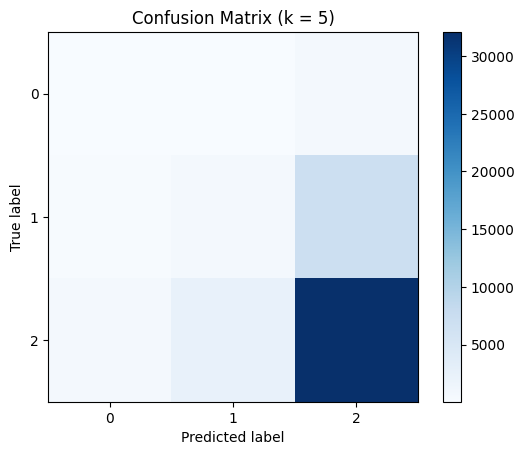

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of k values to try
k_values = [3,4,5]
classes = np.unique(y_test)

# Initialize variables to store the best accuracy and corresponding k value
best_accuracy = 0
best_k = None
best_cm = None

# Loop through the k values
for k in k_values:
    # Create an instance of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the k-NN model
    knn.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(x_test)
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y_test, y_pred)

# Print the best accuracy and corresponding k value
print("Best Accuracy:", best_accuracy)
print("Best k:", best_k)

# Plot the confusion matrix for the best k value
plt.imshow(best_cm, cmap='Blues')
plt.title("Confusion Matrix (k = {})".format(best_k))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.colorbar()
plt.show()


## Learning curve

In [10]:
%pip show scikit-learn
!pip install -U scikit-learn 
%pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /shared-libs/python3.9/py/lib/python3.9/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Not uninstalling scikit-learn at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'scikit-learn'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
Licens

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

def LnC(X,Y,models):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

    common_params = {
        "X": X,
        "y": Y,
        "train_sizes": np.linspace(0.1, 1.0, 2),
        "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }

    for ax_idx, estimator in enumerate(models):
        LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
        handles, label = ax[ax_idx].get_legend_handles_labels()
        ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
        ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/__init__.py)

## Multi-layer perceptron NN

In [5]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
MLP = MLPClassifier(hidden_layer_sizes=(5,5),alpha=0.1,activation="relu")

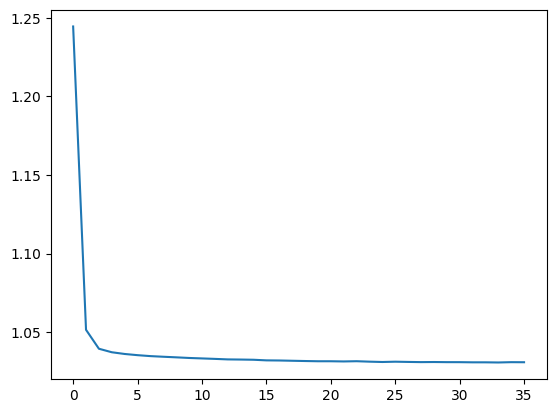

In [6]:
MLP.fit(train_x,train_y)
plt.plot(MLP.loss_curve_)

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = MLP.predict(test_x)

confusion_mat = multilabel_confusion_matrix(test_y, y_pred)
print(confusion_mat)

[[[35870   100]
  [ 7985   103]]

 [[  387  8449]
  [  298 34924]]

 [[43310     0]
  [  748     0]]]


In [9]:
MLP.score(test_x,test_y)
# MLP.best_loss_

0.7950202006446049

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aaf32d5a-faf1-436e-8590-d55fe7980cb3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>